In [11]:
conda install -c conda-forge geopandas

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.7.2               |     pyhd8ed1ab_0          28 KB  conda-forge
    cairo-1.16.0               |       h302bd0f_5         1.0 MB
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.2                |     pyhd8ed1ab_1          10 KB  conda-forge
    conda-24.11.0              |  py312h81bd7bf_0         1.1 MB  conda-forge
    fiona-1.9.5                |  py312hd77ebd4_0         905 KB
    folium-0.18.0              |     pyhd8ed1ab_0          77 KB  conda-forge
    fontconfig-2.14.2          |       h82840c6_0         232 KB  conda

In [1]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 323 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 363 kB/s eta 0:00:01     |███████████████████████████████▊| 11.2 MB 888 kB/s eta 0:00:01
     |████████████████████████████████| 13.7 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 4.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.1 MB/s eta 0:00:011
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [5]:
PollinateTO_df = pd.read_csv("clean_data/PollinateTO_cleaned.csv")

In [6]:
print(PollinateTO_df.columns)

Index(['_id', 'ID', 'YEAR_FUNDED', 'GROUP_NAME', 'PROJECT_NAME', 'GARDEN_TYPE',
       'NUMBER_OF_GARDENS', 'ESTIMATED_GARDEN_SIZE', 'NEIGHBOURHOOD_NUMBER',
       'NIA_OR_EN', 'PRIMARY_LOCATION_NAME', 'PRIMARY_GARDEN_ADDRESS',
       'POSTAL_CODE', 'IS_INDIGENOUS_GARDEN', 'WARD_NAME', 'WARD_NUMBER',
       'geometry'],
      dtype='object')


## Load Weather Data

The weather data dataframe was generated and created by the "weather_data_load.ipynb" file located in the "weather_data_files" folder.

In [9]:
weather_df = pd.read_csv("clean_data/weather_df.csv")

In [10]:
# Count entries of PollinateTO projects for each funded year
year_counts = PollinateTO_df['YEAR_FUNDED'].value_counts()

print(year_counts)

YEAR_FUNDED
2023    44
2022    40
2020    33
2021    32
Name: count, dtype: int64


We can see that there are more projects funded as each year progresses (with the exception of 2020 having 33, decreasing by 1 to 32 projects in 2021). Let's examine this and see if weather played a role.

The weather variables that we want to focus on are:
- Annual average temperature: to observe general climate trends over years
- Annual precipitation: to see if wetter or drier years align with more gardens funded

In [12]:
# Count the number of gardens funded each year
gardens_funded = PollinateTO_df['YEAR_FUNDED'].value_counts().sort_index()
gardens_funded.name = 'gardens_funded'

# Merge weather and garden data on 'year'
merged_df = pd.merge(weather_df, gardens_funded, left_on='Year', right_index=True)

print(merged_df)

      Station Name  Year  Month  Day  Data Quality  Max Temp (°C)  \
709   TORONTO CITY  2020      1    1           NaN            1.0   
710   TORONTO CITY  2020      1    2           NaN            6.2   
711   TORONTO CITY  2020      1    3           NaN            7.7   
712   TORONTO CITY  2020      1    4           NaN            3.6   
713   TORONTO CITY  2020      1    5           NaN            1.9   
...            ...   ...    ...  ...           ...            ...   
2511  TORONTO CITY  2022     12   27           NaN            0.0   
2512  TORONTO CITY  2022     12   28           NaN            4.9   
2513  TORONTO CITY  2022     12   29           NaN            9.8   
2514  TORONTO CITY  2022     12   30           NaN           11.6   
2515  TORONTO CITY  2022     12   31           NaN           10.7   

      Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  \
709            -1.2            -0.1                18.1                 0.0   
710          

In [9]:
# Correlation matrix between weather variables and gardens funded
corr_matrix = merged_df[['Mean Temp (°C)', 'Total Precip (mm)', 'gardens_funded']].corr()

print(corr_matrix)

                   Mean Temp (°C)  Total Precip (mm)  gardens_funded
Mean Temp (°C)           1.000000           0.018685       -0.005620
Total Precip (mm)        0.018685           1.000000        0.003762
gardens_funded          -0.005620           0.003762        1.000000


In [10]:
# Shift weather data by one year
merged_df['lagged_avg_temp'] = merged_df['Mean Temp (°C)'].shift(1)
merged_df['lagged_total_precipitation'] = merged_df['Total Precip (mm)'].shift(1)

# Calculate correlation with lagged weather
lagged_corr = merged_df[['lagged_avg_temp', 'lagged_total_precipitation', 'gardens_funded']].corr()

print(lagged_corr)

                            lagged_avg_temp  lagged_total_precipitation  \
lagged_avg_temp                    1.000000                    0.019611   
lagged_total_precipitation         0.019611                    1.000000   
gardens_funded                    -0.005737                    0.001702   

                            gardens_funded  
lagged_avg_temp                  -0.005737  
lagged_total_precipitation        0.001702  
gardens_funded                    1.000000  


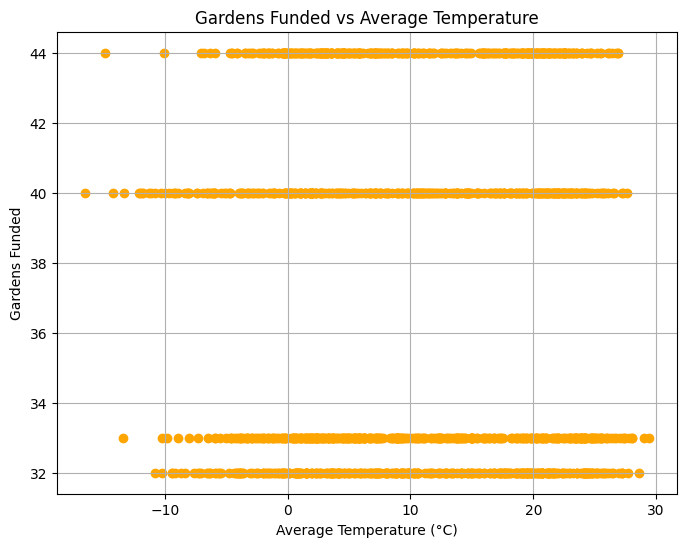

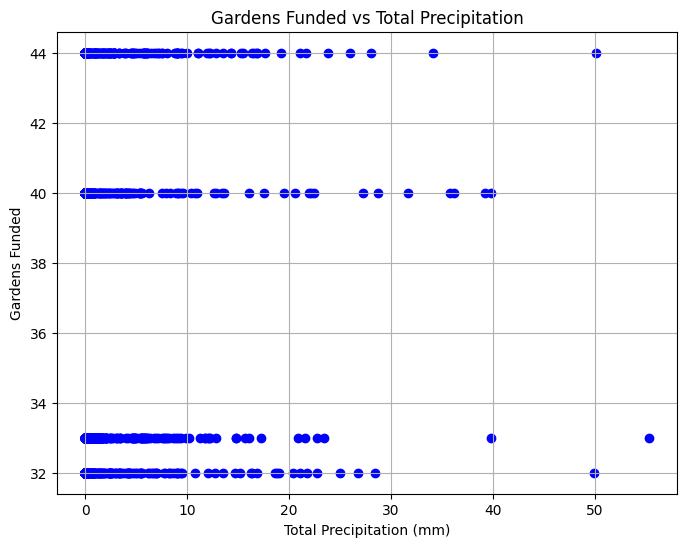

In [11]:
# Scatter plot for gardens funded vs average temperature
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Mean Temp (°C)'], merged_df['gardens_funded'], color='orange')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Gardens Funded')
plt.title('Gardens Funded vs Average Temperature')
plt.grid(True)
plt.show()

# Scatter plot for gardens funded vs total precipitation
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Total Precip (mm)'], merged_df['gardens_funded'], color='blue')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Gardens Funded')
plt.title('Gardens Funded vs Total Precipitation')
plt.grid(True)
plt.show()


There is no clear relationship here from the plots above.

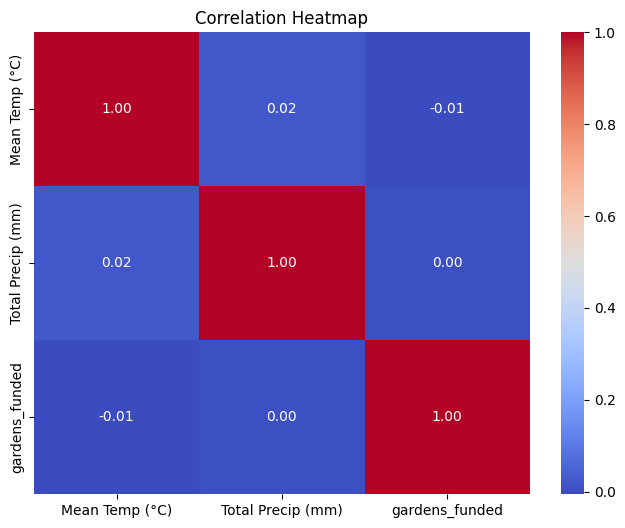

In [12]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Filter weather data for spring and summer months
spring_summer_months = [3, 4, 5, 6, 7, 8]

weather_spring_summer = weather_df[weather_df['Month'].isin(spring_summer_months)].copy()

# Aggregate weather data by year and season
def categorize_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"

weather_spring_summer['Season'] = weather_spring_summer['Month'].apply(categorize_season)

seasonal_weather = weather_spring_summer.groupby(['Year', 'Season']).agg(
    avg_temperature=('Mean Temp (°C)', 'mean'),
    total_precipitation=('Total Precip (mm)', 'sum')
).reset_index()

print(seasonal_weather.head())

   Year  Season  avg_temperature  total_precipitation
0  2019  Spring         6.535165                249.4
1  2019  Summer        21.254945                233.7
2  2020  Spring         7.794565                180.0
3  2020  Summer        22.925275                226.1
4  2021  Spring         8.934783                117.4


In [40]:
# Merge spring/summer weather and garden data on 'year'
merged_spring_summer = pd.merge(seasonal_weather, gardens_funded, left_on='Year', right_index=True)
print(merged_spring_summer)

   Year  Season  avg_temperature  total_precipitation  gardens_funded
2  2020  Spring         7.794565                180.0              33
3  2020  Summer        22.925275                226.1              33
4  2021  Spring         8.934783                117.4              32
5  2021  Summer        22.392308                193.3              32
6  2022  Spring         8.542391                129.3              40
7  2022  Summer        21.755435                184.2              40
8  2023  Spring         8.575000                254.0              44
9  2023  Summer        21.061957                247.3              44


In [41]:
# Shift the year for seasonal weather data to create a lag effect
seasonal_weather['Lagged_Year'] = seasonal_weather['Year'] + 1

# Merge the lagged weather data with gardens funded data
merged_lagged = pd.merge(
    seasonal_weather,
    gardens_funded,
    left_on='Lagged_Year',
    right_index=True
)

# Display the lagged data
print(merged_lagged.head())

   Year  Season  avg_temperature  total_precipitation  Lagged_Year  \
0  2019  Spring         6.535165                249.4         2020   
1  2019  Summer        21.254945                233.7         2020   
2  2020  Spring         7.794565                180.0         2021   
3  2020  Summer        22.925275                226.1         2021   
4  2021  Spring         8.934783                117.4         2022   

   gardens_funded  
0              33  
1              33  
2              32  
3              32  
4              40  


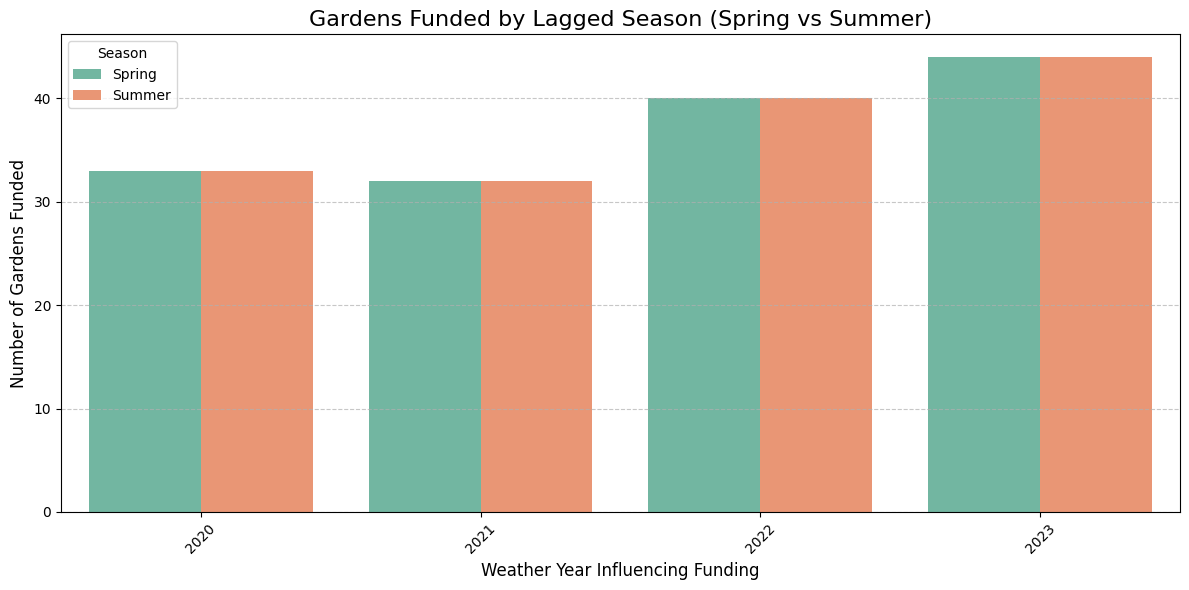

In [ ]:
# Create a grouped bar plot with lagged data
plt.figure(figsize=(12, 6))

sns.barplot(
    data=merged_lagged, 
    x='Lagged_Year', 
    y='gardens_funded',  # Replace with the actual column for gardens funded
    hue='Season',  # Differentiate by season
    palette='Set2'
)

# Customize the plot
plt.title('Gardens Funded by Lagged Season (Spring vs Summer)', fontsize=16)
plt.xlabel('Weather Year Influencing Funding', fontsize=12)
plt.ylabel('Number of Gardens Funded', fontsize=12)
plt.legend(title='Season', loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


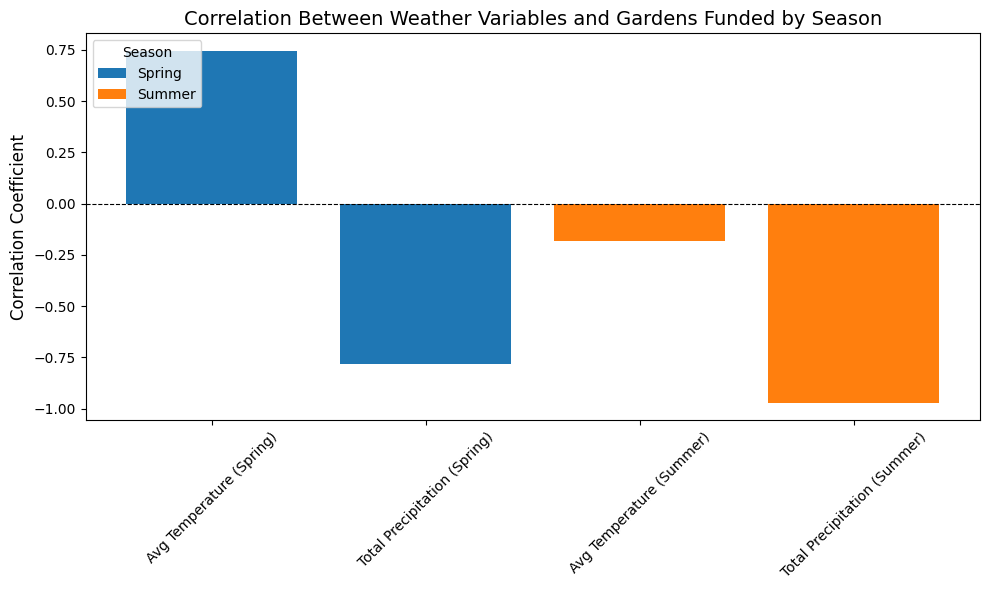

In [ ]:
# Correlation between lagged weather and gardens funded
seasonal_correlations = []

for season in ['Spring', 'Summer']:
    seasonal_data = merged_lagged[merged_lagged['Season'] == season]
    corr_temp = seasonal_data['gardens_funded'].corr(seasonal_data['avg_temperature'])
    corr_precip = seasonal_data['gardens_funded'].corr(seasonal_data['total_precipitation'])
    seasonal_correlations.append({'Season': season, 'Variable': 'Avg Temperature', 'Correlation': corr_temp})
    seasonal_correlations.append({'Season': season, 'Variable': 'Total Precipitation', 'Correlation': corr_precip})

# Convert to a DataFrame for visualization
correlation_df = pd.DataFrame(seasonal_correlations)

# Create a bar plot
plt.figure(figsize=(10, 6))
for season in ['Spring', 'Summer']:
    season_data = correlation_df[correlation_df['Season'] == season]
    plt.bar(
        season_data['Variable'] + f" ({season})", 
        season_data['Correlation'], 
        label=season
    )

# Customize the plot
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
plt.title('Correlation Between Weather Variables and Gardens Funded by Season', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Season', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

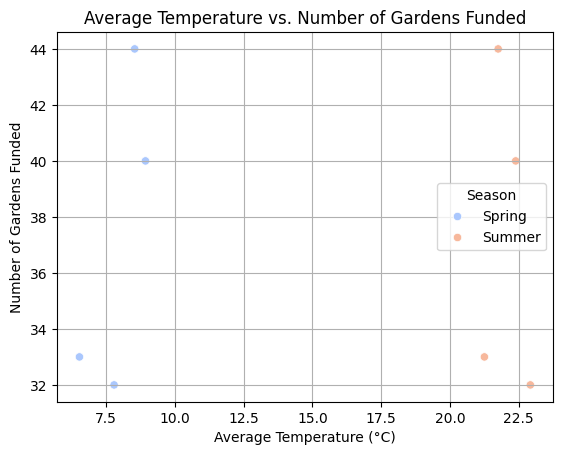

In [54]:
# Scatterplot for visualization
sns.scatterplot(
    data=merged_lagged, 
    x='avg_temperature', 
    y='gardens_funded', 
    hue='Season', 
    palette='coolwarm'
)
plt.title('Average Temperature vs. Number of Gardens Funded')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Gardens Funded')
plt.grid(True)
plt.show()

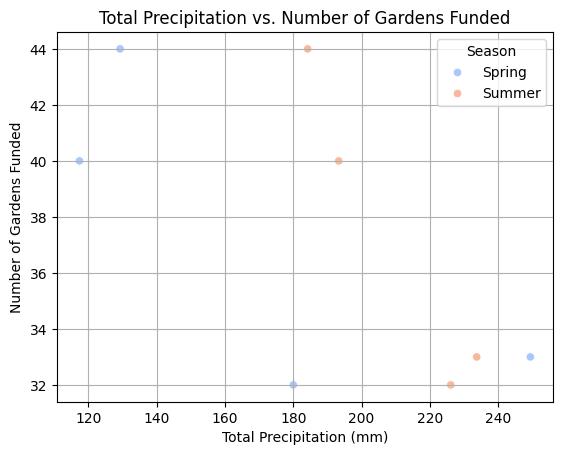

In [53]:
# Scatterplot for visualization
sns.scatterplot(
    data=merged_lagged, 
    x='total_precipitation', 
    y='gardens_funded', 
    hue='Season', 
    palette='coolwarm'
)
plt.title('Total Precipitation vs. Number of Gardens Funded')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Number of Gardens Funded')
plt.grid(True)
plt.show()

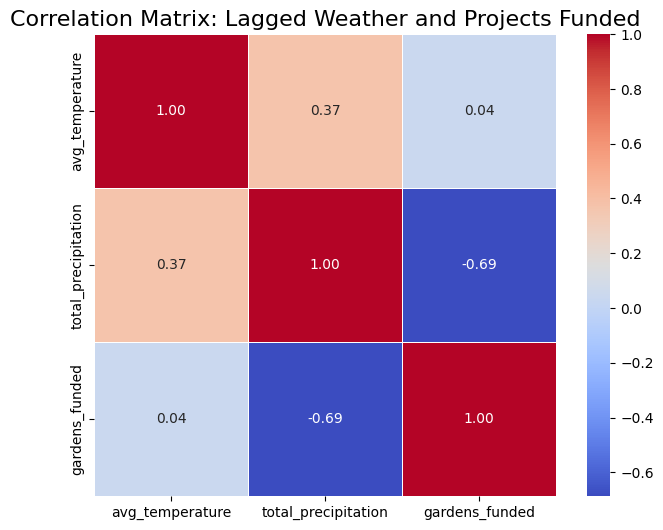

In [56]:
# Select columns to include in the correlation matrix
columns_to_analyze = ['avg_temperature', 'total_precipitation', 'gardens_funded']
correlation_matrix = merged_lagged[columns_to_analyze].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show correlation coefficients
    cmap='coolwarm',  # Diverging color palette
    fmt=".2f",  # Format numbers to 2 decimal places
    linewidths=0.5,  # Add lines between cells
    square=True  # Keep cells square
)

# Titles and labels
plt.title('Correlation Matrix: Lagged Weather and Projects Funded', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()